In [57]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict as defaultdict
from tqdm import trange

In [58]:
env = gym.make('Blackjack-v1', sab = True)

def runBlackJack(env, runs, gamma, value = -0.27726):
    startState = (13, True, 2)
    target = defaultdict(lambda : 1)
    
    for usable in (True, False):
        for dealer in range(1, 11):
            target[(20, dealer, usable)] = 0
            target[(21, dealer, usable)] = 0
            
    VOrdinary = 0
    VWeighted = 0
    C = 0
            
    mseOrdinary = np.zeros(runs)
    mseWeighted = np.zeros(runs)
            
    for t in range(runs):
        env.reset()
        env.state = startState
        state = startState
        episode = []
                
        while True:
            action = 1 if np.random.rand() < 0.5 else 0
            nextState, reward, terminated, x, x = env.step(action)
            episode.append((state, action, reward))
            
            if terminated:
                break
            state = nextState
                
        G = 0
        W = 1
                
        for state, action, reward in episode:
            G = reward + gamma * G  
            C += W
                            
            if action != target[state]:
                break
            W /= 0.5
        
        VWeighted += W * (G - VWeighted)/C
        VOrdinary += W * (G - VOrdinary)/(t + 1)

        mseWeighted[t] = ((VWeighted - value) ** 2)
        mseOrdinary[t] = ((VOrdinary - value) ** 2)
            
    return mseWeighted, mseOrdinary

In [60]:
avgMSEWeigthed, avgMSEOrdinary = np.zeros(10000), np.zeros(10000)

for _ in trange(100):
    x, y = runBlackJack(env, 10000, 1)
    avgMSEWeigthed += x
    avgMSEOrdinary += y
    
avgMSEWeigthed /= 100
avgMSEOrdinary /= 100

100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


In [61]:
print(avgMSEWeigthed)
print(avgMSEOrdinary)

[1.17463589 0.5800434  0.38749587 ... 0.02067621 0.02068035 0.02067514]
[3.35116951 6.46088991 2.09049304 ... 0.02057504 0.02058265 0.02057307]


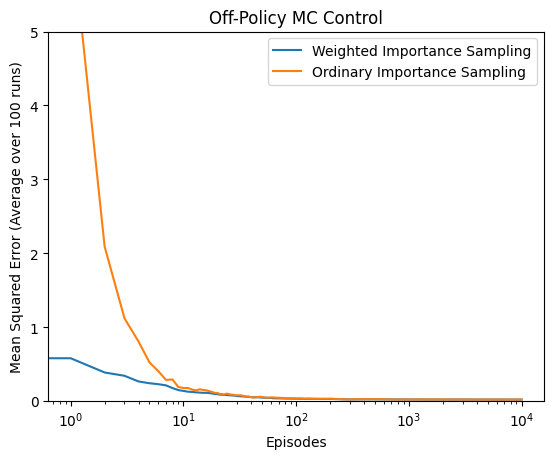

In [65]:
plt.figure()
plt.plot(avgMSEWeigthed, label='Weighted Importance Sampling')
plt.plot(avgMSEOrdinary, label='Ordinary Importance Sampling')
plt.xlabel('Episodes')
plt.ylabel('Mean Squared Error (Average over 100 runs)')

plt.xscale('log')
plt.legend()
plt.title('Off-Policy MC Control')
plt.ylim([0,5])
plt.show()